In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import os

In [4]:
#load df, assign X and y, then split with sklearn:
os.chdir(os.getcwd())
filepath = 'df_processed.csv'

df = pd.read_csv(filepath, encoding='ISO-8859-1')
y = df["rating"]
coords = df["coord"]
X = df.drop(["rating", "coord"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=24)

In [5]:
# Hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [6]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [7]:
# Test Results with Tuned Model

best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"The R^2 value of the Random Forest model is: {r2}")

The R^2 value of the Random Forest model is: 0.6152789478529496


AttributeError: 'RandomForestRegressor' object has no attribute 'estimator_'

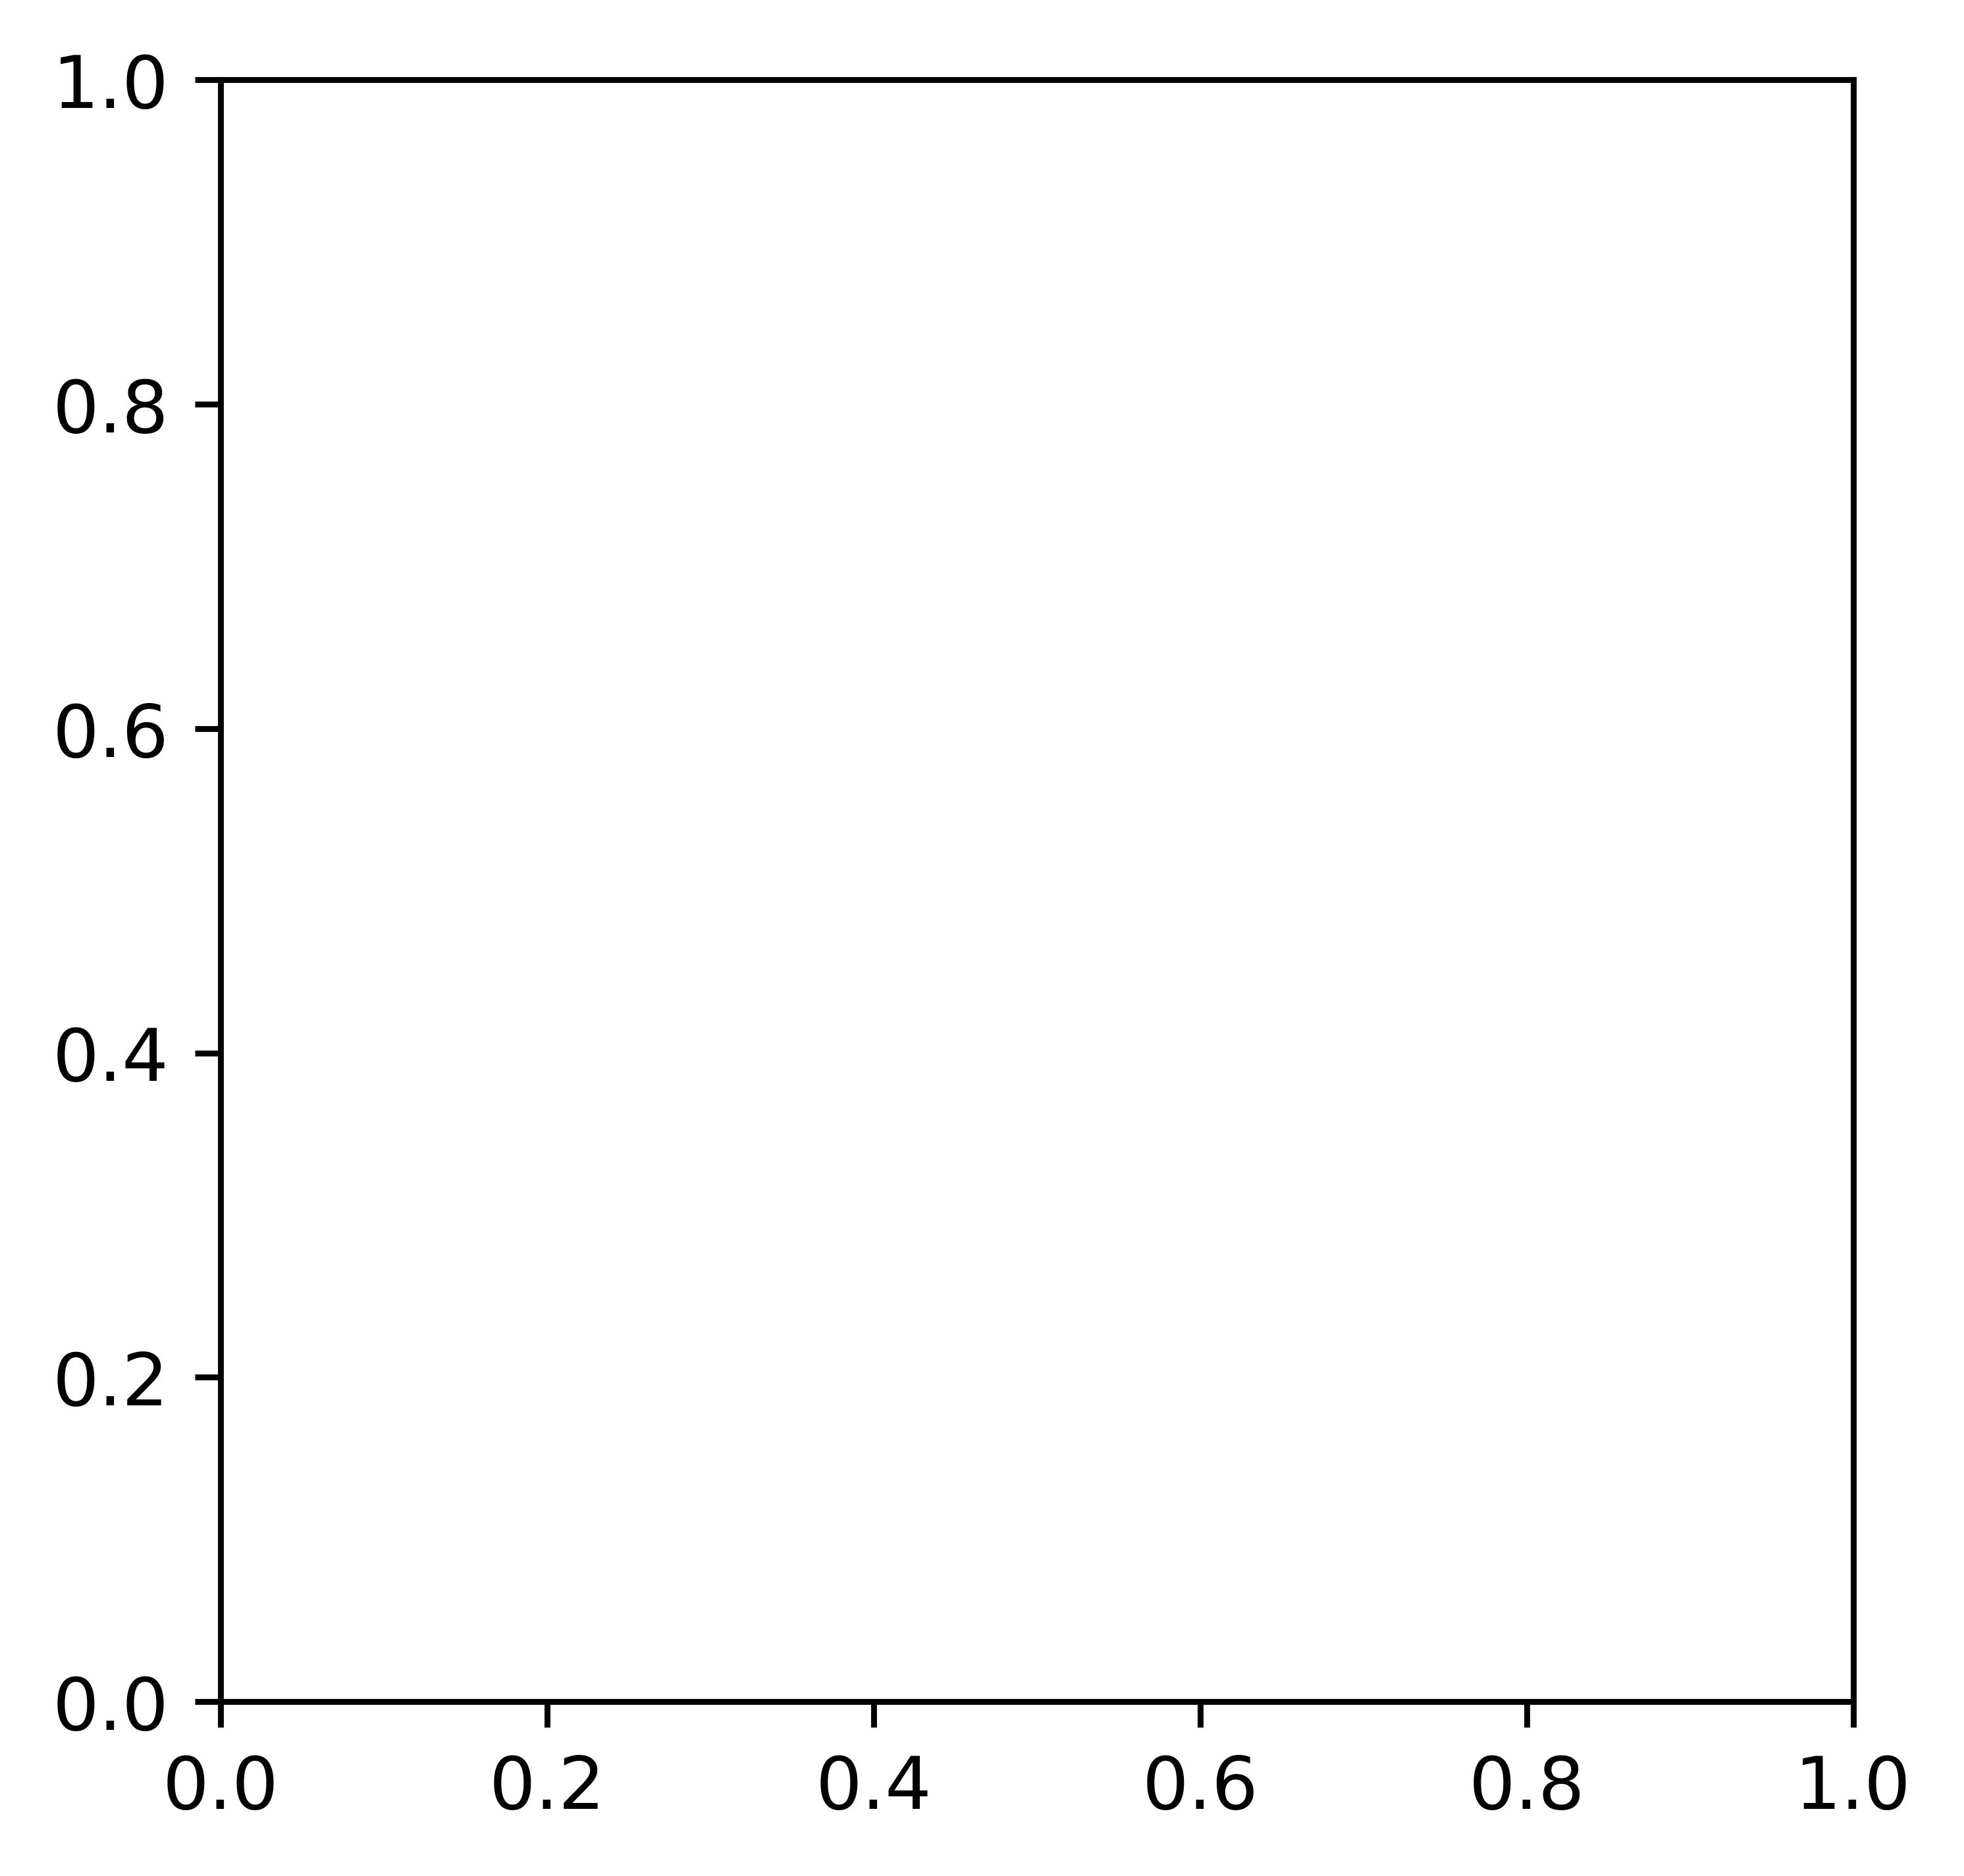

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

plot_rf = RandomForestRegressor(n_estimators = 1000,
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           max_features = 'sqrt',
                           max_depth = 20,
                           bootstrap = True)

plot_rf.fit(X_train, y_train)

x = df.drop(["rating"], axis = 1)

fn=x.columns.values
cn=y.values
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(plot_rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);